# Sales & Profitability Analysis – Imprimimos

## Executive Summary
Analysis of 15 years of sales data shows a 54% shift to digital channels. **Key recommendation:** Focus marketing spend on February/July peaks and diversify the client base to reduce risk.

## Project Overview
This project analyzes historical sales data from *Imprimimos*, a printing and graphics company, from its beginnings in 2010 until August of 2025, with the objective of extracting actionable insights related to revenue, profitability, clients, and job types.

The analysis focuses on understanding:
- Revenue and profit trends over time
- Performance by client and job type
- Margin behavior across services
- Opportunities to improve business decision-making using data

### Note:
All values in the *Valor Total* column are expressed in Colombian pesos (COP)

## Business Questions
- Which clients and job types generate the most revenue?
- Which services are the most profitable?
- Are there identifiable trends or seasonality in sales?
- Where can the company optimize pricing or focus sales efforts?

## Tools & Technologies
- **Python:** pandas
- **Visualization:** matplotlib, seaborn
- **Data Source:** Historical transactional sales data (Excel)

This project follows a structured data analysis workflow, including data cleaning, exploratory data analysis (EDA), visualization, and insight generation.

## Data Loading and Initial Inspection

The dataset contains historical records of sales transactions, including information about clients, job types, revenue, profit margins, and transaction dates.

The first step is to load the dataset and perform an initial inspection to understand its structure, data types, and overall quality.

In [40]:
# Importing necessary libraries and loading the dataset

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px

# Optional: Set pandas display format for currency
pd.options.display.float_format = '{:,.2f}'.format

#file_path = r'C:\Users\Asus\OneDrive\Documentos\Portfolio_Projects\Imprimimos\dataset imprimimos original.xlsx'
df = pd.read_excel('dataset imprimimos original.xlsx')
df

,FECHA,Empresa,TIPO TRABAJO,VR. TOTAL,canal venta,margen de ganancia
0,2017-11-15,10 km,señal,28000,punto fisico,0.52
1,2021-10-26,15 años,retablo,45000,punto fisico,0.65
2,2025-03-25,15 años,retablo,360000,redes sociales,0.59
3,2015-05-21,2 fotos en vertical,retablo,25000,punto fisico,0.83
4,2014-07-11,3 marias,logo,35000,punto fisico,0.67
...,...,...,...,...,...,...
17728,2013-12-04,zoopark,tarjetas,35000,punto fisico,0.50
17729,2014-07-07,zoopark,tarjetas,35000,punto fisico,0.53
17730,2013-12-04,zoopark,volantes,75000,punto fisico,0.49
17731,2013-12-11,zoopark,volantes,90000,pagina web,0.49


In [41]:
# Rename Columns, Translate to English
df.rename(columns={
    'FECHA': 'Date',
    'Empresa': 'Client',
    'TIPO TRABAJO': 'Job_Type',
    'VR. TOTAL': 'Revenue',
    'canal venta': 'Sales_Channel',
    'margen de ganancia': 'Margin_Percentage'
}, inplace=True)

df.head()

,Date,Client,Job_Type,Revenue,Sales_Channel,Margin_Percentage
0,2017-11-15,10 km,señal,28000,punto fisico,0.52
1,2021-10-26,15 años,retablo,45000,punto fisico,0.65
2,2025-03-25,15 años,retablo,360000,redes sociales,0.59
3,2015-05-21,2 fotos en vertical,retablo,25000,punto fisico,0.83
4,2014-07-11,3 marias,logo,35000,punto fisico,0.67


In [42]:
# Verifying data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17733 entries, 0 to 17732
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               17733 non-null  datetime64[ns]
 1   Client             17733 non-null  object        
 2   Job_Type           17733 non-null  object        
 3   Revenue            17733 non-null  int64         
 4   Sales_Channel      17733 non-null  object        
 5   Margin_Percentage  17733 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 831.4+ KB


In [43]:
# Statistical summary of numerical columns (Revenue and Margin_Percentage)
df[['Revenue', 'Margin_Percentage']].describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,"17,733.00","100,837.24","204,898.68",0.00,"30,000.00","52,500.00","104,000.00","11,200,000.00"
Margin_Percentage,"17,733.00",0.57,0.10,0.48,0.51,0.53,0.57,0.85


### Initial Observations
- The dataset includes both numerical and categorical variables
- Revenue field requires validation since there are values at zero

## Data Cleaning and Preparation

Before performing analysis, the dataset will be cleaned and standardized to ensure accuracy and consistency.

In [44]:
# Filter null values
df.isnull().sum()

Date                 0
Client               0
Job_Type             0
Revenue              0
Sales_Channel        0
Margin_Percentage    0
dtype: int64

In [45]:
# Checking for zero values in the dataset
(df == 0).sum()

Date                  0
Client                0
Job_Type              0
Revenue              17
Sales_Channel         0
Margin_Percentage     0
dtype: int64

In [46]:
# Remove rows with 0 Revenue (incomplete transactions), they only represent 0.1% of the data
df = df[df['Revenue'] != 0]
(df == 0).sum()

Date                 0
Client               0
Job_Type             0
Revenue              0
Sales_Channel        0
Margin_Percentage    0
dtype: int64

In [47]:
# Checking statistical summary after cleaning
df[['Revenue', 'Margin_Percentage']].describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,"17,716.00","100,934.00","204,973.15",36.00,"30,000.00","53,000.00","105,000.00","11,200,000.00"
Margin_Percentage,"17,716.00",0.57,0.10,0.48,0.51,0.53,0.57,0.85


In [48]:
# We notice there are some low-value outliers. Let's investigate it further.
df[df['Revenue'] < 3000]

,Date,Client,Job_Type,Revenue,Sales_Channel,Margin_Percentage
247,2016-09-21,afiche,afiche,2500,referido,0.53
774,2017-04-05,arcangel,impresión laser,2500,referido,0.55
3886,2019-02-14,costialitas,impresión laser,2000,referido,0.54
6508,2022-02-15,foto,retablo,2000,referido,0.52
7520,2010-04-05,hab,facturas,2000,referido,0.54
8627,2021-04-05,induseg,adhesivo,2000,referido,0.54
8648,2019-06-28,induseg,etiquetas,500,referido,0.55
8661,2020-07-06,induseg,numeros,1000,referido,0.50
9083,2019-07-29,jesus y virgen,impresión laser,2500,referido,0.53
12748,2021-03-01,pareja,iman,2500,referido,0.51


In [49]:
# We filter transactions below or equal to 1,000 COP as they are likely test data or entry errors.
# These low-value transactions represent less than 0.1% of the total data.
df = df[df['Revenue'] > 1000]
df[['Revenue']].describe().T

,count,mean,std,min,25%,50%,75%,max
Revenue,"17,713.00","100,951.01","204,986.34","2,000.00","30,000.00","53,000.00","105,000.00","11,200,000.00"


In [50]:
# Standardize text data
# We create a function to standardize the names

def standardize_text(text):
    if isinstance(text, str): # Check if the value is a string
        return text.strip().title() # Remove leading/trailing spaces and convert to title case
    return text # Return the value as is if it's not a string

# Apply the function to relevant columns
df['Client'] = df['Client'].apply(standardize_text)
df['Job_Type'] = df['Job_Type'].apply(standardize_text)
df['Sales_Channel'] = df['Sales_Channel'].apply(standardize_text)
df.head()

,Date,Client,Job_Type,Revenue,Sales_Channel,Margin_Percentage
0,2017-11-15,10 Km,Señal,28000,Punto Fisico,0.52
1,2021-10-26,15 Años,Retablo,45000,Punto Fisico,0.65
2,2025-03-25,15 Años,Retablo,360000,Redes Sociales,0.59
3,2015-05-21,2 Fotos En Vertical,Retablo,25000,Punto Fisico,0.83
4,2014-07-11,3 Marias,Logo,35000,Punto Fisico,0.67


In [51]:
# Check unique values in Job_Type column and then standardize
df['Job_Type'].sort_values().unique()

array(['Abanicos', 'Acrilico', 'Actas', 'Adhesivo', 'Afiche', 'Agenda',
       'Anuarios', 'Aviso', 'Back Lite', 'Bandera',
       'Banner Ojaletes 80 X 30', 'Bastidor', 'Bolas Antiestress - 30',
       'Boleta', 'Boletas', 'Bolsas', 'Bolsillos', 'Bordado', 'Botones',
       'Branding', 'Brochure', 'Cajas', 'Calendario', 'Camisetas',
       'Caratula Cd', 'Carnet', 'Carpa', 'Carpetas', 'Carta Banco',
       'Cartas', 'Cartillas', 'Cartones', 'Catalogo', 'Cedula', 'Cenefa',
       'Certificados',
       'Chaleco Xl Azul - Dia Antilavado - Fe190 - Pago 3 Diciembre',
       'Cheques', 'Cintas', 'Circulos', 'Circulos 350 Y 700 Dibujando',
       'Circulos 7 Cm', 'Circulos Transparente 2,2 Cm',
       'Circulos Transparente Mate - 20 Hojas',
       'Circulos Transparentes 14 Laminas 140 Cm X 55 Cm',
       'Circulos Transparentes 18 Laminas', 'Circulos Vinilo', 'Cirel',
       'Cliset', 'Cobro Escolar', 'Codigo Qr', 'Cojin',
       'Colgadores Puerta', 'Colgantes', 'Collage', 'Collar',
    

In [52]:
# Create a dictionary where each key is the final category
# and each value is a list of raw strings that should map to it
mapping_groups = {
    'Adhesivo': [
        'Circulos', 'Circulos 350 Y 700 Dibujando', 'Circulos 7 Cm',
        'Circulos Transparente 2,2 Cm', 'Circulos Transparente Mate - 20 Hojas',
        'Circulos Transparentes 14 Laminas 140 Cm X 55 Cm',
        'Circulos Transparentes 18 Laminas', 'Circulos Vinilo'
    ],
    'Banner': ['Banner Ojaletes 80 X 30'],
    'Bolas Antiestres': ['Bolas Antiestress - 30'],
    'Boletas': ['Boleta'],
    'Chaleco': ['Chaleco Xl Azul - Dia Antilavado - Fe190 - Pago 3 Diciembre'],
    'Comprobantes Egreso': ['Comprobanes Egreso'],
    'Exhibidores': ['Exhibidores Chip Plasticas (2.000)'],
    'Fotos': ['Foto'],
    'Impresion Laser': ['Impreion Laser', 'Impresión Laser'],
    'Posters': [
        'Afiche',
        'Kheit Richards 140 X 90', 'Mini Poster 14 X 20 (12)',
        'Muchacha 60 X 80', 'Nombre Corte Laser 70 X 20',
        'Omar Rayo 50 X 50 (2)'
    ],
    'Letras Corte': ['Letra De Corte'],
    'Marqueteria': ['Marco'],
    'Menus': ['Menu', 'Menus Periodico'],
    'Minutas': ['Minutas - 50 Unidad'],
    'Modulo Madera': ['Modulos Madera - 45 Cm X 50 - 3'],
    'Moños': ['Moños En Cinta Satin - 300 - Fe 132'],
    'Opalina': ['Opalina 100 X 70', 'Opalina 70 X 50'],
    'Pasacalles': ['Pasacalles 3 Mt X 1 Mt - Con Palos'],
    'Señales': ['Señal']
}

# Convert the grouped mapping into a flat dictionary
flat_mapping = {item: key for key, values in mapping_groups.items() for item in values}

# Apply the mapping
df['Job_Type'] = df['Job_Type'].replace(flat_mapping)
df['Job_Type'].sort_values().unique()

array(['Abanicos', 'Acrilico', 'Actas', 'Adhesivo', 'Agenda', 'Anuarios',
       'Aviso', 'Back Lite', 'Bandera', 'Banner', 'Bastidor',
       'Bolas Antiestres', 'Boletas', 'Bolsas', 'Bolsillos', 'Bordado',
       'Botones', 'Branding', 'Brochure', 'Cajas', 'Calendario',
       'Camisetas', 'Caratula Cd', 'Carnet', 'Carpa', 'Carpetas',
       'Carta Banco', 'Cartas', 'Cartillas', 'Cartones', 'Catalogo',
       'Cedula', 'Cenefa', 'Certificados', 'Chaleco', 'Cheques', 'Cintas',
       'Cirel', 'Cliset', 'Cobro Escolar', 'Codigo Qr', 'Cojin',
       'Colgadores Puerta', 'Colgantes', 'Collage', 'Collar',
       'Colombinas', 'Comandas', 'Combo Coronavirus',
       'Comprobantes Egreso', 'Consentimiento', 'Control De Saldos',
       'Control Diario', 'Copas', 'Correccion Catalogo',
       'Correccion Vinilos', 'Corte', 'Cotizaciones', 'Cuaderno',
       'Decoracion', 'Diploma', 'Diseño', 'Documento Equivalente', 'Dtf',
       'Dulces Corte', 'Edicion', 'Emblemas Carro', 'Enmarcado',
     

In [53]:
# Translate Job_Type values to English
# Create a translation dictionary
products_mapping = {
    "Abanicos": "Hand Fans",
    "Acrilico": "Acrylic",
    "Actas": "Meeting Minutes",
    "Adhesivo": "Sticker",
    "Agenda": "Planner",
    "Anuarios": "Yearbooks",
    "Aviso": "Notice Sign",
    "Back Lite": "Backlit Sign",
    "Bandera": "Flag",
    "Banner": "Banner",
    "Bastidor": "Stretcher Frame",
    "Bolas Antiestres": "Stress Balls",
    "Boletas": "Tickets",
    "Bolsas": "Bags",
    "Bolsillos": "Document Pockets",
    "Bordado": "Embroidery",
    "Botones": "Pin Buttons",
    "Branding": "Branding",
    "Brochure": "Brochure",
    "Cajas": "Boxes",
    "Calendario": "Calendar",
    "Camisetas": "T-shirts",
    "Caratula Cd": "CD Cover",
    "Carnet": "ID Badge",
    "Carpa": "Tent",
    "Carpetas": "Folders",
    "Carta Banco": "Bank Letter",
    "Cartas": "Letters",
    "Cartillas": "Booklets",
    "Cartones": "Cardboards",
    "Catalogo": "Catalog",
    "Cedula": "ID Card",
    "Cenefa": "Decorative Border",
    "Certificados": "Certificates",
    "Chaleco": "Vest",
    "Cheques": "Checks",
    "Cintas": "Ribbons",
    "Cirel": "Cirel",
    "Cliset": "Cliset",
    "Cobro Escolar": "School Payment Forms",
    "Codigo Qr": "QR Code",
    "Cojin": "Cushion",
    "Colgadores Puerta": "Door Hangers",
    "Colgantes": "Hanging Signs",
    "Collage": "Collage",
    "Collar": "Lanyard",
    "Colombinas": "Lollipops",
    "Comandas": "Order Slips",
    "Combo Coronavirus": "Coronavirus Kit",
    "Comprobantes Egreso": "Expense Vouchers",
    "Consentimiento": "Consent Form",
    "Control De Saldos": "Balance Tracking Form",
    "Control Diario": "Daily Log",
    "Copas": "Cups",
    "Correccion Catalogo": "Catalog Revision",
    "Correccion Vinilos": "Vinyl Revision",
    "Corte": "Cutting",
    "Cotizaciones": "Estimates",
    "Cuaderno": "Notebook",
    "Decoracion": "Decoration",
    "Diploma": "Diploma",
    "Diseño": "Design",
    "Documento Equivalente": "Equivalent Document",
    "Dtf": "DTF Printing",
    "Dulces Corte": "Candy Cutouts",
    "Edicion": "Editing",
    "Emblemas Carro": "Car Emblems",
    "Enmarcado": "Framing",
    "Entregas": "Deliveries",
    "Escarapelas": "Badge Holders",
    "Esferos": "Pens",
    "Esmerilado": "Frosted Finish",
    "Espejo": "Mirror",
    "Estampado": "Print Transfer",
    "Etiquetas": "Labels",
    "Exhibidores": "Displays",
    "Expografo": "Plotter Print",
    "Facturas": "Invoices",
    "Fichos": "Queue Tokens",
    "Firma Digital": "Digital Signature",
    "Formato Devolucion": "Return Form",
    "Forro Lavadora": "Washing Machine Cover",
    "Fotomural": "Photo Mural",
    "Fotos": "Photos",
    "Gorras": "Caps",
    "Hablador": "Shelf Talker",
    "Historia Clinica": "Medical Record",
    "Hoja Membrete": "Letterhead",
    "Iman": "Magnet",
    "Impresion Laser": "Laser Printing",
    "Instalacion": "Installation",
    "Invitaciones": "Invitations",
    "Letra De Cambio": "Bill of Exchange",
    "Letras Acrilico": "Acrylic Letters",
    "Letras Corte": "Cut Letters",
    "Letreros Perros": "Beware of Dog Signs",
    "Libretas": "Notepads",
    "Lienzo": "Canvas",
    "Lista Precios": "Price List",
    "Logo": "Logo",
    "Manillas": "Wristbands",
    "Mano De Obra": "Labor",
    "Marqueteria": "Woodcraft Framing",
    "Mate": "Matte Finish",
    "Maxceramica": "MaxCeramic Print",
    "Menus": "Menus",
    "Microperforado": "Perforated Vinyl",
    "Minutas": "Event Menus",
    "Modulo Madera": "Wood Module",
    "Moños": "Decorative Bows",
    "Mug": "Mug",
    "Mural": "Mural",
    "Notas De Entrega": "Delivery Notes",
    "Numeros": "Numbers",
    "Ojos Acrilico": "Acrylic Eyelets",
    "Opalina": "Opaline Paper",
    "Oraciones": "Prayer Cards",
    "Orden De Pedidos": "Order Form",
    "Orden De Produccion": "Production Order",
    "Orden De Servicio": "Service Order",
    "Pad Mouse": "Mouse Pad",
    "Panaflex": "Panaflex Banner",
    "Papeleras": "Trash Bins",
    "Pare": "Stop Sign",
    "Pasacalles": "Street Banner",
    "Pedidos": "Orders",
    "Pendon": "Roll-up Banner",
    "Plegable": "Folded Brochure",
    "Poliptico": "Multi-Panel Brochure",
    "Ponchos": "Ponchos",
    "Portafolio": "Portfolio",
    "Portapendon": "Banner Stand",
    "Portaretablo": "Poster Holder",
    "Posters": "Posters",
    "Retablo": "Display Board",
    "Revista": "Magazine",
    "Ristras": "Hanging Strips",
    "Rompetrafico": "Traffic Barrier Sign",
    "Rotulos": "Signage Labels",
    "Sello": "Stamp",
    "Señales": "Signs",
    "Sobres": "Envelopes",
    "Solicitud Reserva": "Reservation Request",
    "Tacos": "Pads",
    "Talonarios": "Receipt Books",
    "Tapetes Periodico": "Newspaper Floor Mats",
    "Tarjetas": "Cards",
    "Termos": "Thermos Bottles",
    "Triptico": "Trifold Brochure",
    "Trofeos": "Trophies",
    "Troquelado": "Die Cutting",
    "Tulas Cambre": "Cambre Drawstring Bags",
    "Vales Cortesia": "Courtesy Vouchers",
    "Valla": "Billboard",
    "Varios": "Miscellaneous",
    "Vasos": "Glasses",
    "Vinilo": "Vinyl",
    "Volantes": "Flyers"
}

df['Job_Type'] = df['Job_Type'].replace(products_mapping)
df['Job_Type'].sort_values().unique()

array(['Acrylic', 'Acrylic Eyelets', 'Acrylic Letters', 'Backlit Sign',
       'Badge Holders', 'Bags', 'Balance Tracking Form', 'Bank Letter',
       'Banner', 'Banner Stand', 'Beware of Dog Signs',
       'Bill of Exchange', 'Billboard', 'Booklets', 'Boxes', 'Branding',
       'Brochure', 'CD Cover', 'Calendar', 'Cambre Drawstring Bags',
       'Candy Cutouts', 'Canvas', 'Caps', 'Car Emblems', 'Cardboards',
       'Cards', 'Catalog', 'Catalog Revision', 'Certificates', 'Checks',
       'Cirel', 'Cliset', 'Collage', 'Consent Form', 'Coronavirus Kit',
       'Courtesy Vouchers', 'Cups', 'Cushion', 'Cut Letters', 'Cutting',
       'DTF Printing', 'Daily Log', 'Decoration', 'Decorative Border',
       'Decorative Bows', 'Deliveries', 'Delivery Notes', 'Design',
       'Die Cutting', 'Digital Signature', 'Diploma', 'Display Board',
       'Displays', 'Document Pockets', 'Door Hangers', 'Editing',
       'Embroidery', 'Envelopes', 'Equivalent Document', 'Estimates',
       'Event Menus', '

In [54]:
# Checking unique values in Sales_Channel column and then standardize
df['Sales_Channel'].sort_values().unique()


array(['Pagina Web', 'Punto Fisico', 'Redes Sociales', 'Referido'],
      dtype=object)

In [55]:
# Translate Sales_Channel values to English
sales_channel_mapping = {
    'Referido': 'Referral',
    'Redes Sociales': 'Social Media',
    'Pagina Web': 'Website',
    'Punto Fisico': 'Physical Store'
}

df['Sales_Channel'] = df['Sales_Channel'].replace(sales_channel_mapping)
df['Sales_Channel'].sort_values().unique()

array(['Physical Store', 'Referral', 'Social Media', 'Website'],
      dtype=object)

In [56]:
# Make sure 'Date' column is in datetime format and check for any incorrect dates
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].sort_values().unique()

<DatetimeArray>
['2010-01-03 00:00:00', '2010-02-22 00:00:00', '2010-02-24 00:00:00',
 '2010-02-25 00:00:00', '2010-02-26 00:00:00', '2010-02-27 00:00:00',
 '2010-03-01 00:00:00', '2010-03-02 00:00:00', '2010-03-03 00:00:00',
 '2010-03-04 00:00:00',
 ...
 '2025-08-04 00:00:00', '2025-08-05 00:00:00', '2025-08-06 00:00:00',
 '2025-08-07 00:00:00', '2025-08-08 00:00:00', '2025-08-09 00:00:00',
 '2025-08-11 00:00:00', '2025-08-12 00:00:00', '2025-08-13 00:00:00',
 '2025-08-14 00:00:00']
Length: 3590, dtype: datetime64[ns]

In [57]:
# Creating new columns: 'Year', 'Month' and 'Profit' for later analysis
df['Year'] = df['Date'].dt.year

df['Month'] = df['Date'].dt.month

df['Profit'] = df['Revenue'] * df['Margin_Percentage']

### Data Quality Actions
- Removed and validated records with zero or less than the normal amount
- Standardized column names for readability
- Translated Job_Type and Sales_Channel values to English
- Verified date columns to make sure they are in datetime format
- Created additional time-based features (year, month) to support trend analysis

## Exploratory Data Analysis (EDA)

Exploratory analysis was conducted to identify patterns, trends, and relationships within the data, focusing on revenue, profitability, clients, and job types.

In [58]:
# Top 10 sales by year
year_sales = df.groupby('Year')['Revenue'].sum().reset_index()
year_sales.sort_values(by='Revenue', ascending=False).head(10)

,Year,Revenue
14,2024,177740425
13,2023,143192600
12,2022,133101800
15,2025,132515100
4,2014,127936650
3,2013,126684300
9,2019,118401300
8,2018,115690550
11,2021,113006650
10,2020,107790600


In [59]:
# Top sales by month
month_sales = df.groupby('Month')['Revenue'].sum().reset_index()
month_sales.sort_values(by='Revenue', ascending=False)

,Month,Revenue
1,2,170424320
6,7,169776350
3,4,155534100
2,3,151269090
4,5,151092620
7,8,149845800
9,10,148580550
10,11,144402940
5,6,142972725
8,9,136134400


In [60]:
# Top 10 products by revenue
job_type_revenue = df.groupby('Job_Type')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)
job_type_revenue.head(10)

,Job_Type,Revenue
51,Display Board,444625305
25,Cards,247374250
63,Flyers,93962700
151,Vinyl,92295350
130,Roll-up Banner,84763500
137,Sticker,82897700
76,Invoices,60183000
135,Signs,57761100
155,Woodcraft Framing,54180500
24,Cardboards,45509000


In [61]:
# Top 10 products by profit
job_type_profit = df.groupby('Job_Type')['Profit'].sum().reset_index().sort_values(by='Profit', ascending=False)
job_type_profit.head(10)

,Job_Type,Profit
51,Display Board,"303,406,597.70"
25,Cards,"127,357,882.50"
63,Flyers,"48,387,020.00"
151,Vinyl,"47,607,617.50"
130,Roll-up Banner,"44,506,770.00"
137,Sticker,"43,052,819.00"
76,Invoices,"31,178,950.00"
135,Signs,"29,808,445.50"
155,Woodcraft Framing,"28,316,025.00"
24,Cardboards,"23,797,700.00"


### Total Year Sales

We'll take a look at the long‑term revenue evolution to spot growth phases, plateaus, or declines in total sales over the years.

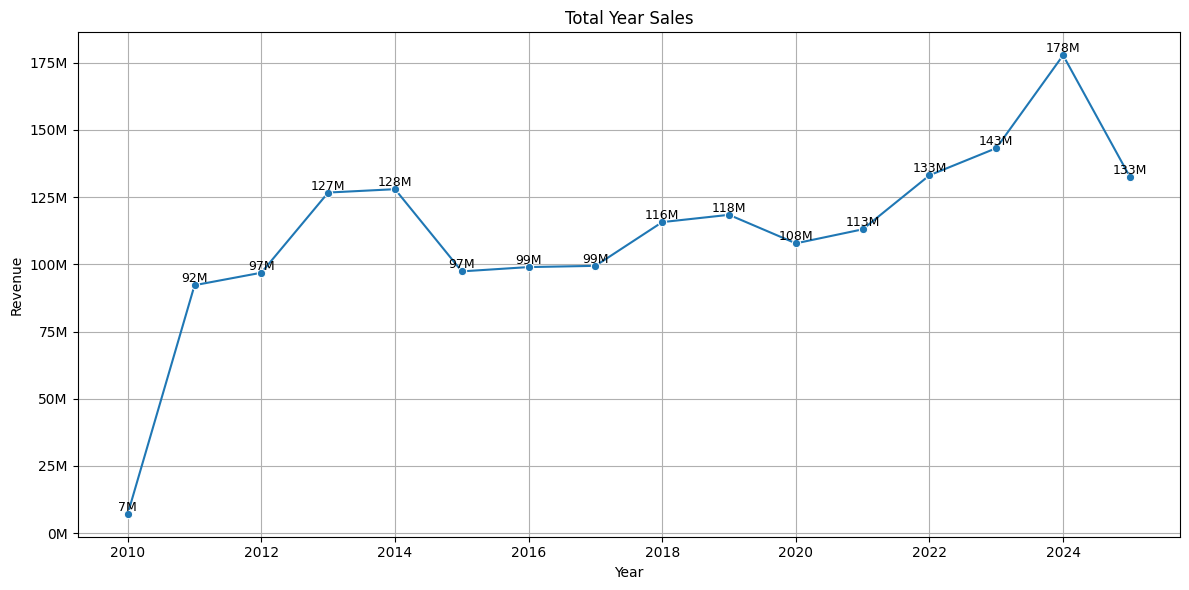

In [62]:
# Total sales by year showing amount in COP

plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=year_sales, x='Year', y='Revenue', marker='o')

plt.title('Total Year Sales')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(True)

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
for x, y in zip(year_sales['Year'], year_sales['Revenue']):
    ax.text(x, y, f'{y/1e6:.0f}M', ha='center', va='bottom',
            fontsize=9)
    
plt.tight_layout()
plt.show()

**Insight:**  
Sales climb from 2010 ($7,214,300) to a clear peak in 2024 ($177,740,425), with strong momentum from 2022–2024; 2025 drops to $132,515,100 but it’s a partial year (through Aug), so it’s not directly comparable to full years.


### Total Month Sales

This chart will reveal seasonality and monthly demand patterns that can guide production planning and marketing timing.


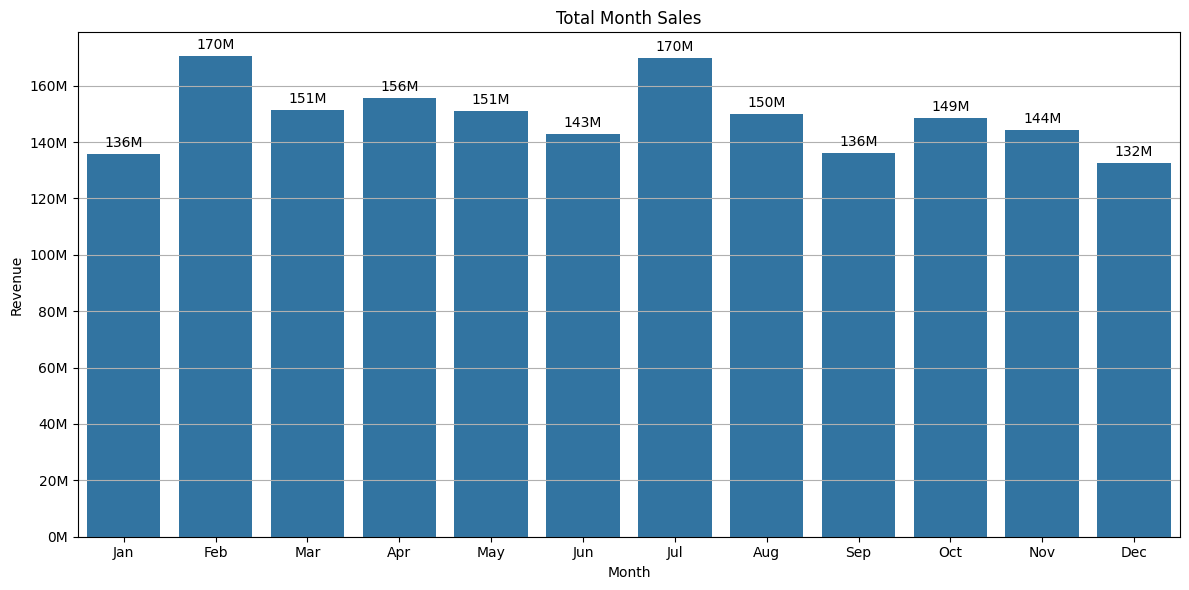

In [63]:
# Total sales by month
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=month_sales, x='Month', y='Revenue')

plt.title('Total Month Sales')
plt.xlabel('Month')
plt.ylabel('Revenue')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))

for container in ax.containers:
    ax.bar_label(container, 
                 labels=[f'{v.get_height()/1e6:.0f}M' for v in container], 
                 padding=3)

plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Insight:**  
February is the strongest month ($170,424,320) with July very close ($169,776,350), while December is the weakest ($132,498,085), suggesting demand spikes early and mid‑year and softens into year‑end.


### Total Year Sales & Channel Type Chart

We compare performance of digital vs physical sales channels over time to understand channel mix shifts.

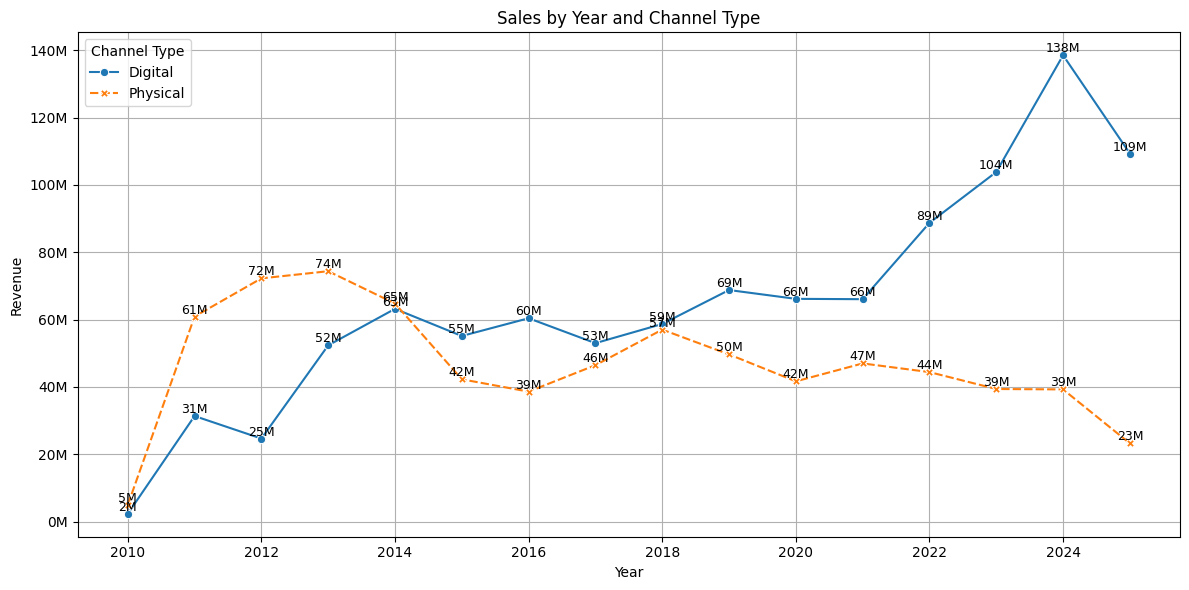

In [64]:
# Creating a column to classify sales channels
def classify_channel(channel):
    if channel in ['Website', 'Social Media']:
        return 'Digital'
    else:
        return 'Physical'

df['Channel_Type'] = df['Sales_Channel'].apply(classify_channel)

# Grouping sales by year and type of channel
year_channel_type_sales = df.groupby(['Year', 'Channel_Type'])['Revenue'].sum().reset_index()

# Pivoting the table to have channel types as columns
pivot_sales = year_channel_type_sales.pivot(index='Year', columns='Channel_Type', values='Revenue').fillna(0)

# Showing sales by year and type of channel
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=pivot_sales, markers=True)
plt.title('Sales by Year and Channel Type')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.grid(True)
plt.legend(title='Channel Type')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
for column in pivot_sales.columns:
    for x, y in zip(pivot_sales.index, pivot_sales[column]):
        ax.text(x, y, f'{y/1e6:.0f}M', ha='center', va='bottom',
                fontsize=9)

plt.tight_layout()
plt.show()

**Insight:**  
Physical channels dominate 2010–2014, but digital overtakes in 2015 and stays ahead every year after; the gap widens sharply in 2022–2024, with digital reaching $138,495,925 in 2024 versus $39,244,500 for physical.

### Channel Sales Interactive Line Chart
This interactive line chart tracks the evolution of revenue sources over the last 15 years.

In [65]:
# Analyzing sales by sales channel
sales_by_channel_year = df.groupby(['Year', 'Sales_Channel'])['Revenue'].sum().reset_index()

fig = px.line(
    sales_by_channel_year, 
    x='Year', 
    y='Revenue', 
    color='Sales_Channel',
    title='Revenue Evolution by Sales Channel (2010-2025)', 
    markers=True,   
    labels={'Revenue': 'Total Revenue (COP)', 'Sales_Channel': 'Sales Channel'},
    width=1200, height=600
)

fig.update_layout(hovermode='x unified',
                  title={'x': 0.5})
fig.show()

**Insight:**
The mix shifts around 2019—Social Networks emerges as the largest contributor from 2019 onward, while Physical steadily declines (from $62,543,150 in 2014 to $22,706,000 in 2025); Web Page is strong through 2018 but becomes relatively small later, and Referrals stays minor except a spike in 2024 ($8,453,400).

### Top 10 Products by Total Sales & Profitability

Here we rank job types by revenue and profit to spotlight the products that contribute most to the company.

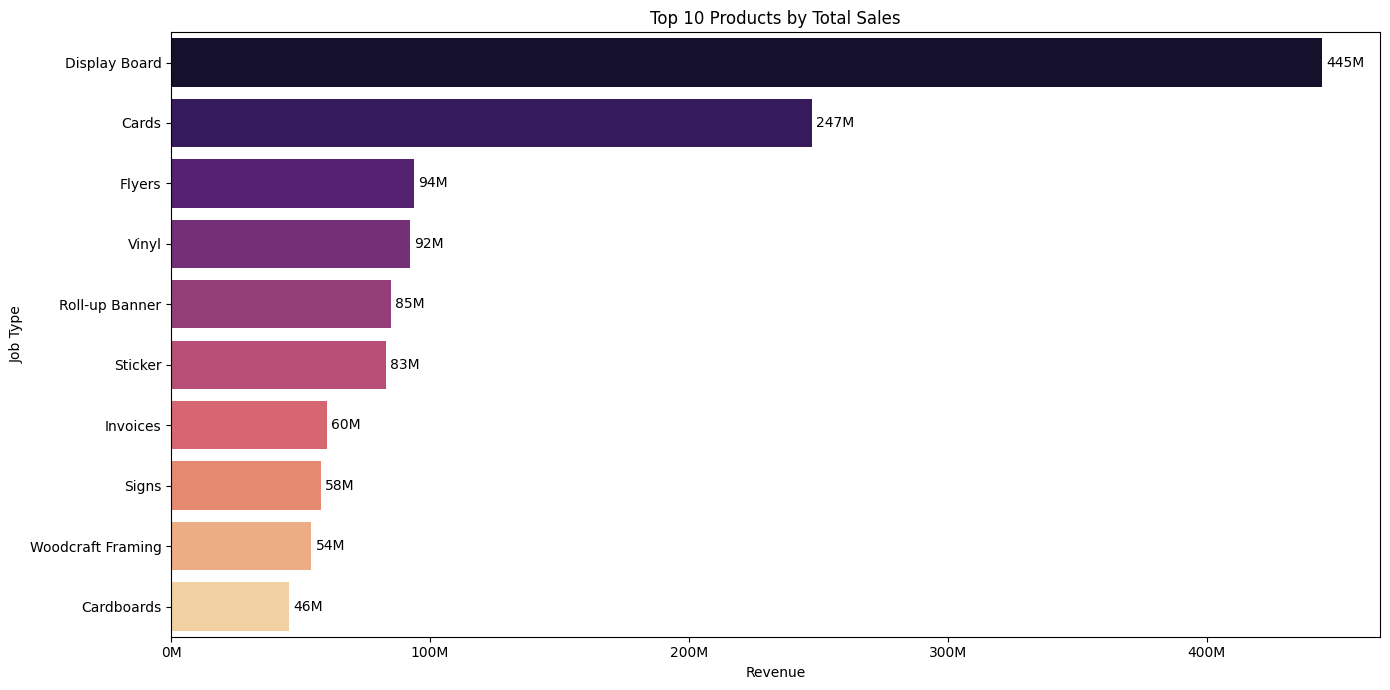

In [66]:
# Select first ten products
top_n = 10
top_revenue = job_type_revenue.head(top_n)
top_profit = job_type_profit.head(top_n)

# Chart of products by total sales
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=top_revenue, x='Revenue', y='Job_Type', hue='Job_Type', legend=False, palette='magma')
plt.title(f'Top {top_n} Products by Total Sales')
plt.xlabel('Revenue')
plt.ylabel('Job Type')
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
for container in ax.containers:
    ax.bar_label(container, 
                 labels=[f'{v.get_width()/1e6:.0f}M' for v in container], 
                 padding=3)
plt.tight_layout()
plt.show()

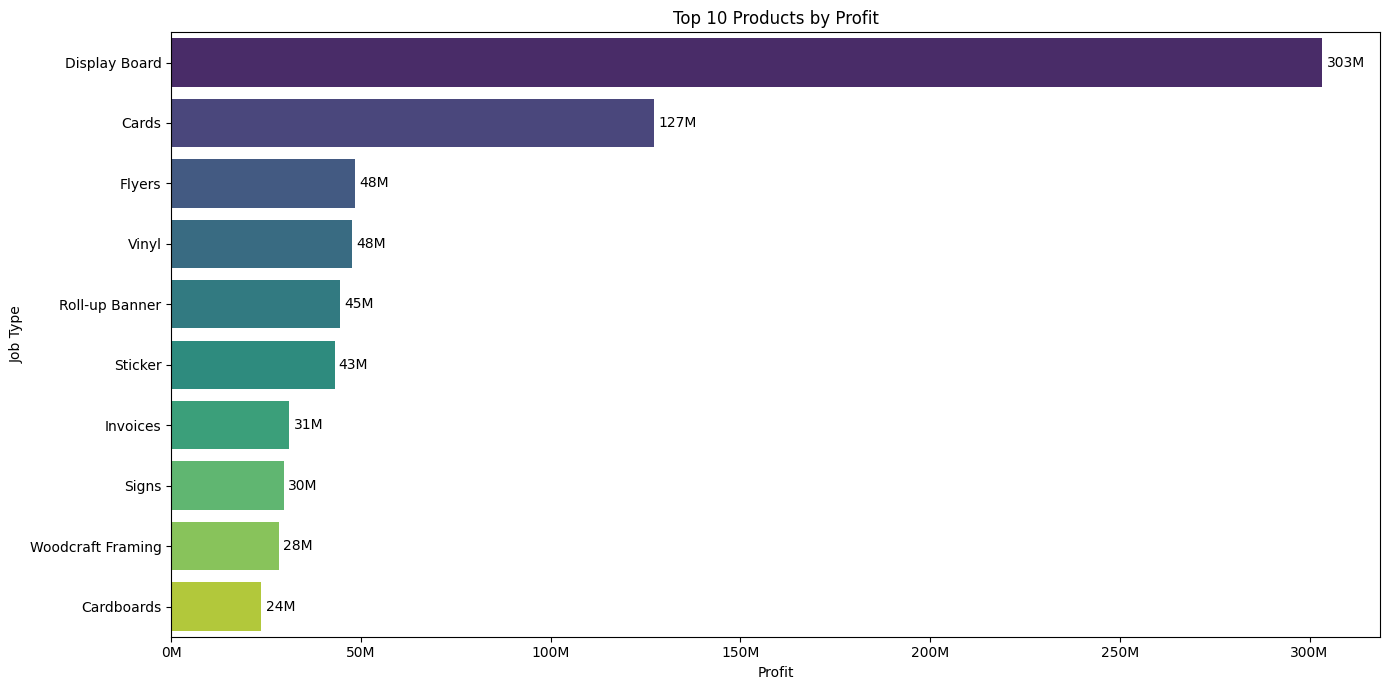

In [67]:
# Chart of products by profit
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=top_profit, x='Profit', y='Job_Type', hue='Job_Type', legend=False, palette='viridis')
plt.title(f'Top {top_n} Products by Profit')
plt.xlabel('Profit')
plt.ylabel('Job Type')
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
for container in ax.containers:
    ax.bar_label(container, 
                 labels=[f'{v.get_width()/1e6:.0f}M' for v in container], 
                 padding=3)
plt.tight_layout()
plt.show()

**Insight # 1:**
Display Boards dominates total sales ($444,625,305), far ahead of Cards ($247,374,250); after the top two, revenue drops to Flyers, Vynils, and Roll-Up Banners, indicating a steep concentration in a few core products.

**Insight # 2:**
Display Boards has the highest average profit, followed by Cards and Flyers. High revenue doesn’t always equal high profit, but this is not the case as the same products on the revenue chart are listed on the profit chart.

### Top 10 Products by Average Profit Margin
A comparison of the products with the highest margins, revealing which offerings contribute most to overall profitability

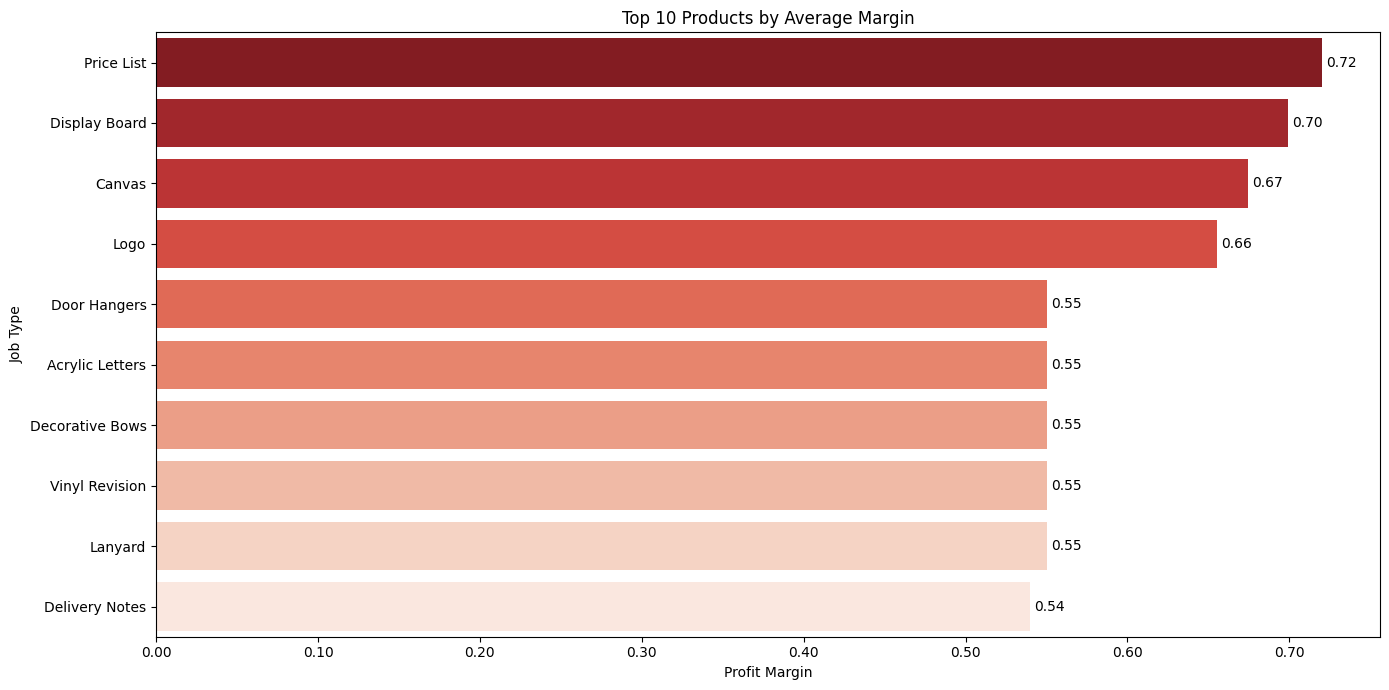

In [68]:
# Chart of products by average margin
job_type_margin = df.groupby('Job_Type')['Margin_Percentage'].mean().sort_values(ascending=False).reset_index()

top_margin = job_type_margin.head(top_n)

plt.figure(figsize=(14, 7))
ax = sns.barplot(data=top_margin, x='Margin_Percentage', y='Job_Type', hue='Job_Type', legend=False, palette='Reds_r')
plt.title(f'Top {top_n} Products by Average Margin')
plt.xlabel('Profit Margin')
plt.ylabel('Job Type')
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:.2f}'))
for container in ax.containers:
    ax.bar_label(container, 
                 labels=[f'{v.get_width():.2f}' for v in container], 
                 padding=3)
plt.tight_layout()
plt.show()

**Insight:**
Price List has the highest average margin (0.72), followed by Display Board (0.7) and Canvas (0.67). We can observe how Display Board is a standout in the last three charts.

### Top 10 Clients by Total Sales
This section highlights how revenue is distributed across our top clients, helping identify levels of client concentration.

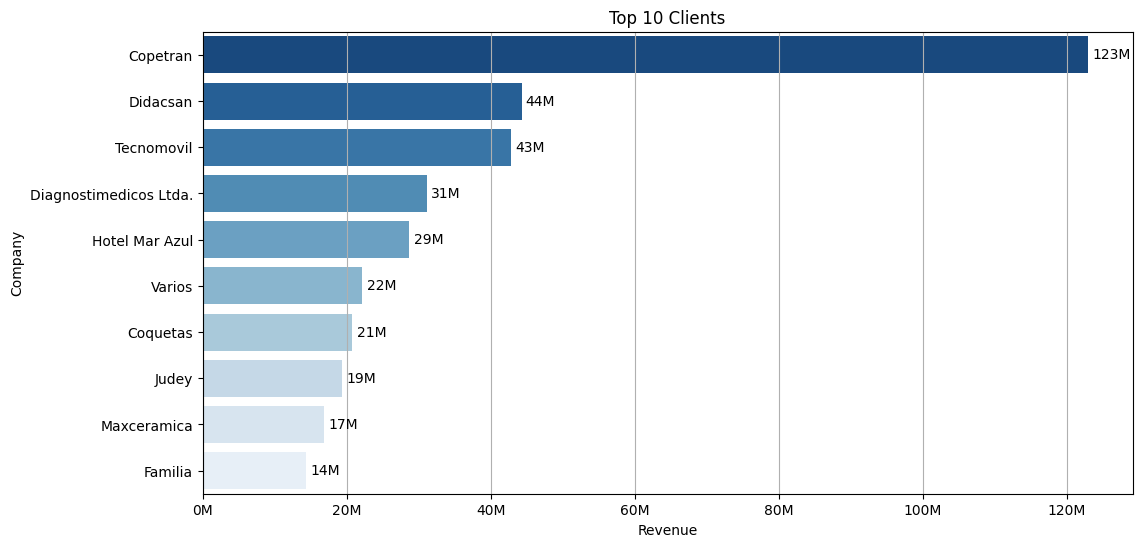

In [69]:
# Analyzing top 10 client companies by total sales
top_clients = df.groupby("Client")["Revenue"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
ax = sns.barplot(x=top_clients.values, y=top_clients.index, hue=top_clients.index, palette='Blues_r')
plt.title("Top 10 Clients")
plt.xlabel("Revenue")
plt.ylabel("Company")

ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
for container in ax.containers:
    ax.bar_label(container, 
                 labels=[f'{v.get_width()/1e6:.0f}M' for v in container], 
                 padding=3)
    
plt.grid(axis='x')
plt.show()

**Insight:**
Copetran leads by a wide margin ($123,025,025), with the next two (Didacsan at $44,292,050 and Tecnomovil at $42,801,300) far behind, indicating heavy reliance on one major account.

### Top 10 Clients by Profit Contribution
This chart focuses on Profit (Revenue × Margin %). This ranking identifies the clients that actually contribute the most to the company, which may differ from those with the highest volume.

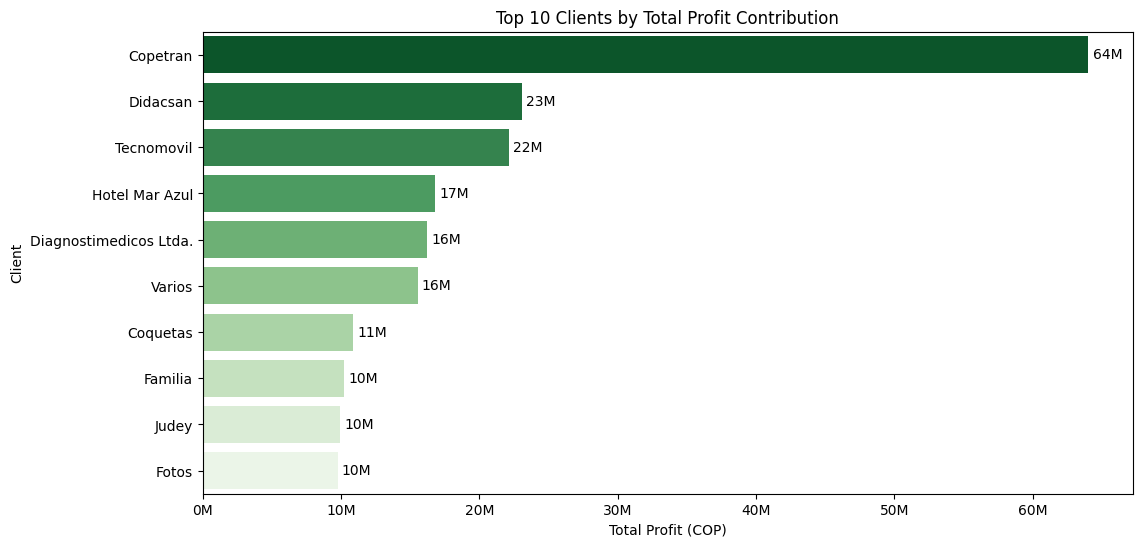

In [70]:
# Top 10 clients by total profit contribution
client_performance = df.groupby('Client')[['Revenue', 'Profit']].sum().reset_index()
top_clients = client_performance.sort_values(by='Profit', ascending=False).head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_clients, x='Profit', y='Client', hue='Client', palette='Greens_r')
plt.title('Top 10 Clients by Total Profit Contribution')
plt.xlabel('Total Profit (COP)')
plt.ylabel('Client')
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f}M'))
for container in ax.containers:
    ax.bar_label(container, 
                 labels=[f'{v.get_width()/1e6:.0f}M' for v in container], 
                 padding=3)
plt.show()

**Insight:**
We can observe how Copetran contributes a disproportionate amount of the total profit compared to the rest of the top 10. While this is a valuable client, the company is highly vulnerable to losing this account.

In [71]:
# Statistical description of total sales by year
df["Year"] = pd.to_datetime(df["Date"]).dt.year
df["Month"] = pd.to_datetime(df["Date"]).dt.month

df.groupby("Year")["Revenue"].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2010,126.00,"57,256.35","77,428.84","2,000.00","30,000.00","30,000.00","50,750.00","600,000.00"
2011,"1,258.00","73,317.65","103,133.22","4,000.00","30,000.00","40,000.00","75,000.00","1,260,000.00"
2012,"1,228.00","78,887.54","128,316.87","3,000.00","30,000.00","50,000.00","85,000.00","2,973,300.00"
2013,"1,336.00","94,823.58","235,343.75","2,000.00","30,000.00","50,000.00","90,000.00","4,508,400.00"
2014,"1,436.00","89,092.37","159,548.38","4,000.00","30,000.00","50,000.00","90,000.00","2,650,000.00"
2015,"1,097.00","88,759.46","106,780.61","6,000.00","30,000.00","58,000.00","105,000.00","1,280,000.00"
2016,"1,015.00","97,505.50","221,586.99","2,500.00","30,000.00","60,000.00","111,575.00","6,038,550.00"
2017,"1,196.00","83,132.36","115,125.78","2,500.00","30,000.00","50,000.00","100,000.00","2,370,000.00"
2018,"1,485.00","77,906.09","118,007.18","3,500.00","30,000.00","45,000.00","90,000.00","1,900,000.00"


In [72]:
# Statistical description of total profit by year
df.groupby("Year")["Profit"].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2010,126.00,"29,645.87","40,351.88","1,080.00","15,300.00","16,200.00","26,987.50","318,000.00"
2011,"1,258.00","38,097.81","53,690.57","2,200.00","15,525.00","20,000.00","39,612.50","642,600.00"
2012,"1,228.00","41,167.29","65,986.05","1,500.00","15,352.50","25,500.00","45,262.50","1,486,650.00"
2013,"1,336.00","50,029.01","118,226.47",980.00,"15,900.00","26,000.00","47,700.00","2,254,200.00"
2014,"1,436.00","49,315.80","86,135.80","2,040.00","15,900.00","27,500.00","49,000.00","1,378,000.00"
2015,"1,097.00","53,902.41","67,732.69","2,940.00","18,200.00","33,810.00","63,000.00","844,800.00"
2016,"1,015.00","59,138.00","119,826.91","1,325.00","18,575.00","36,450.00","65,907.00","3,140,046.00"
2017,"1,196.00","49,100.77","66,433.39","1,375.00","17,225.00","29,275.00","59,500.00","1,279,800.00"
2018,"1,485.00","45,344.43","73,558.47","1,995.00","15,600.00","24,500.00","50,500.00","1,577,000.00"


## Conclusions and Recommendations

### Conclusions
- Revenue shows strong long‑term growth, peaking in 2024.
- Seasonality is clear: demand is strongest in February and July, and weakest in December.
- The business has shifted from physical to digital channels since 2015, with digital now the dominant driver.
- Sales are concentrated in a few products (especially Display Boards and Cards) and a single major client (Copetran).

### Recommendations
- Plan capacity and campaigns around peak months (Feb/Jul) and create targeted promotions to lift Dec/late‑year demand.
- Continue investing in digital channels, particularly social media, while stabilizing or repositioning physical sales where strategic.
- Protect and expand top‑performing products (Display Boards, Cards) with pricing, upselling, and quality focus.
- Grow high‑margin services (e.g., Price Lists, Canvas) with dedicated sales packages to improve profitability.
- Focus on "cloning" the success of the top account to diversify the profitability portfolio.